In [15]:
SEED = 1776

import nltk
from matplotlib import pyplot as plt
import sklearn as sk, pandas as pd, numpy as np
import string
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download("stopwords")
nltk.download("wordnet")

guardian = pd.read_csv("DataSets/GuardianUncleaned.csv", encoding='utf-8')
nyt      = pd.read_csv("DataSets/nyt_unclean.csv", encoding='utf-8')
fake     = pd.read_csv("DataSets/fake.csv", encoding='utf-8')

[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ubuntu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [63]:
guardian.head()

,title,text,class,date,allCaps,adjectives,superlatives
0,Brexit Britain 'highly attractive' to investor...,A post-Brexit Britain could become “highly att...,0,2016-09-26T23:23:15Z,0.0,43.0,1.0
1,LeBron James will not protest during anthem bu...,LeBron James says he will not join Colin Kaepe...,0,2016-09-26T23:14:08Z,0.0,62.0,0.0
2,Prisons inspector slates HMP Bedford as 'abjec...,It is easier to get illegal drugs than to get ...,0,2016-09-26T23:01:10Z,0.0,86.0,1.0
3,Women poorly represented in top 1% of UK earne...,Fewer than one in five of the UK’s top 1% of e...,0,2016-09-26T23:01:10Z,0.0,59.0,3.0
4,Consultants enjoy higher demand and pay in wak...,The vote to leave the EU has increased demand ...,0,2016-09-26T23:01:10Z,1.0,40.0,4.0


In [64]:
nyt.head()

,text,date,title,class,allCaps
0,"Times Square, the famed Manhattan crossroads, ...",2016-11-09T23:40:37Z,"In New York, Deep Confusion Stands in Contrast...",0,0.0
1,New York City’s Education Department said on W...,2016-11-09T23:32:56Z,Rezoning Plan to Remake 3 Upper West Side Scho...,0,17.0
2,"CONCORD, N.H. — New Hampshire Gov. Maggie Hass...",2016-11-09T23:23:23Z,Maggie Hassan Unseats Kelly Ayotte in New Hamp...,0,2.0
3,(Want to get this briefing by email? Here’s th...,2016-11-09T23:05:52Z,"Donald Trump, Republican Party, Marijuana: You...",0,2.0
4,"On May 4, 1963, the Rolling Stones, then a scr...",2016-11-09T23:04:08Z,How the Rolling Stones Became Fashion Icons,0,0.0


In [65]:
fake.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,...,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,allCaps
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,...,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,1.0
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,...,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,2.0
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,...,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,2.0
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,...,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,7.0
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,...,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,11.0


In [60]:
datasets = [guardian, nyt, fake]
print("WORD".isupper())
print("Word".isupper())
print("WoRd".isupper())

True
False
False


# ALL CAPS

In [45]:
import string

for data in datasets:
    data.loc[:,"allCaps"] = np.zeros(len(data))
    for idx, body in enumerate(data.text):
        count = 0
        if type(body) == str:
            for w in body.split():
                if len(w) > 3 and w.isupper(): count += 1

        title = data.title[idx]
        if type(title) == str:
            title = ("".join([" " if ch in string.punctuation else ch for ch in title])).split()
            for w in title:
                if len(w) > 3 and w.isupper(): count += 1
                
        data.allCaps[idx] = count

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Class: 0
Class: 0
Class: 1


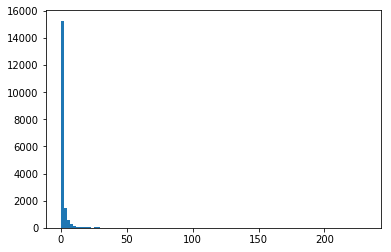

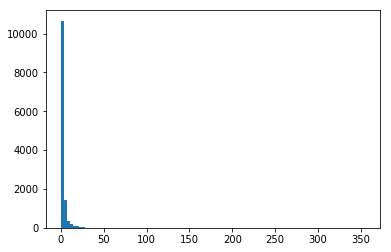

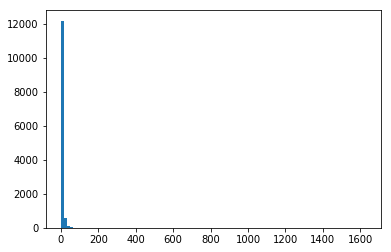

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline


for data in datasets:
    allCapsCounts = data.loc[:,"allCaps"]
    
    print("Class: " + str(data["class"][0]))
    
    plt.figure()
    plt.hist(np.array(allCapsCounts), bins=100)

In [46]:
guardian.head()
count = 0
for w in guardian.text[0].split():
    if len(w) > 3 and w.isupper(): 
        print(w)
        count += 1
count

0

In [47]:
nyt.head()

,text,date,title,class,allCaps
0,"Times Square, the famed Manhattan crossroads, ...",2016-11-09T23:40:37Z,"In New York, Deep Confusion Stands in Contrast...",0,0.0
1,New York City’s Education Department said on W...,2016-11-09T23:32:56Z,Rezoning Plan to Remake 3 Upper West Side Scho...,0,17.0
2,"CONCORD, N.H. — New Hampshire Gov. Maggie Hass...",2016-11-09T23:23:23Z,Maggie Hassan Unseats Kelly Ayotte in New Hamp...,0,2.0
3,(Want to get this briefing by email? Here’s th...,2016-11-09T23:05:52Z,"Donald Trump, Republican Party, Marijuana: You...",0,2.0
4,"On May 4, 1963, the Rolling Stones, then a scr...",2016-11-09T23:04:08Z,How the Rolling Stones Became Fashion Icons,0,0.0


In [48]:
fake.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,...,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,allCaps
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,...,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,1.0
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,...,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,2.0
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,...,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,2.0
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,...,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,7.0
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,...,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,11.0


In [49]:
import nltk
from nltk.tag import pos_tag

nltk.download('averaged_perceptron_tagger')
words = fake.loc[0,"title"].lower().split()
words = ["stupidest"] + words
nltkPOS = pos_tag(words)
nltkPOS

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ubuntu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('stupidest', 'JJS'),
 ('muslims', 'NNS'),
 ('busted:', 'VBP'),
 ('they', 'PRP'),
 ('stole', 'VBP'),
 ('millions', 'NNS'),
 ('in', 'IN'),
 ('gov’t', 'NN'),
 ('benefits', 'NNS')]

# Superlative + adjectives count

In [66]:
superlative_counts = []

import string

for data in datasets:
    data.loc[:,"adjectives"]   = np.zeros(len(data))
    data.loc[:,"superlatives"] = np.zeros(len(data))

    for idx, body in enumerate(data.text):
        sl_counts = 0
        adj_counts = 0
        
        title = data.title[idx]

        if not type(title) == str: title = ""
        if not type(body) == str : body  = ""

        words = (title + " " + body).lower().split()
        nltkPOS = pos_tag(words)
        for tag in nltkPOS:
            if tag[1].startswith('JJ'): adj_counts += 1
            if tag[1] == 'JJS': sl_counts += 1
        
        data.adjectives[idx] = adj_counts
        data.superlatives[idx] = sl_counts

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [67]:
nyt.head()

,text,date,title,class,allCaps,adjectives,superlatives
0,"Times Square, the famed Manhattan crossroads, ...",2016-11-09T23:40:37Z,"In New York, Deep Confusion Stands in Contrast...",0,0.0,120.0,1.0
1,New York City’s Education Department said on W...,2016-11-09T23:32:56Z,Rezoning Plan to Remake 3 Upper West Side Scho...,0,17.0,81.0,0.0
2,"CONCORD, N.H. — New Hampshire Gov. Maggie Hass...",2016-11-09T23:23:23Z,Maggie Hassan Unseats Kelly Ayotte in New Hamp...,0,2.0,28.0,1.0
3,(Want to get this briefing by email? Here’s th...,2016-11-09T23:05:52Z,"Donald Trump, Republican Party, Marijuana: You...",0,2.0,113.0,1.0
4,"On May 4, 1963, the Rolling Stones, then a scr...",2016-11-09T23:04:08Z,How the Rolling Stones Became Fashion Icons,0,0.0,213.0,5.0


In [68]:
guardian.head()

,title,text,class,date,allCaps,adjectives,superlatives
0,Brexit Britain 'highly attractive' to investor...,A post-Brexit Britain could become “highly att...,0,2016-09-26T23:23:15Z,0.0,56.0,1.0
1,LeBron James will not protest during anthem bu...,LeBron James says he will not join Colin Kaepe...,0,2016-09-26T23:14:08Z,0.0,68.0,0.0
2,Prisons inspector slates HMP Bedford as 'abjec...,It is easier to get illegal drugs than to get ...,0,2016-09-26T23:01:10Z,0.0,92.0,1.0
3,Women poorly represented in top 1% of UK earne...,Fewer than one in five of the UK’s top 1% of e...,0,2016-09-26T23:01:10Z,0.0,72.0,3.0
4,Consultants enjoy higher demand and pay in wak...,The vote to leave the EU has increased demand ...,0,2016-09-26T23:01:10Z,1.0,44.0,4.0


In [78]:
fake["class"] = np.ones(len(fake), dtype=int)
fake.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,...,replies_count,participants_count,likes,comments,shares,type,allCaps,adjectives,superlatives,class
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,...,0,1,0,0,0,bias,1.0,8.0,0.0,1
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,...,0,1,0,0,0,bias,2.0,18.0,0.0,1
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,...,0,1,0,0,0,bias,2.0,27.0,0.0,1
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,...,0,0,0,0,0,bias,7.0,4.0,0.0,1
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,...,0,0,0,0,0,bias,11.0,43.0,0.0,1


Class: 0


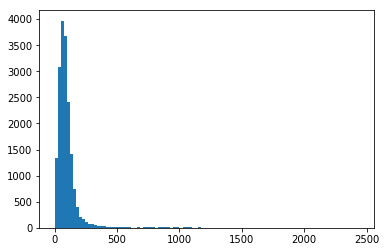

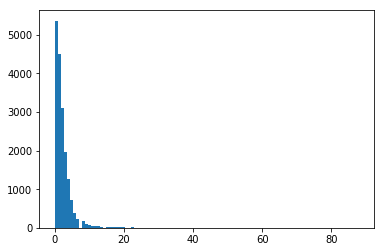

Class: 0


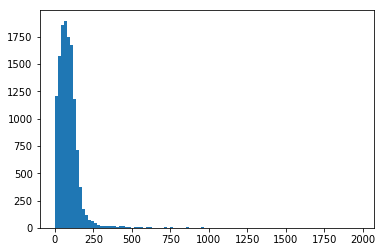

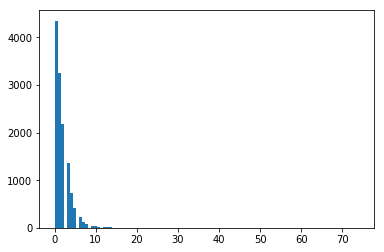

Class: 1


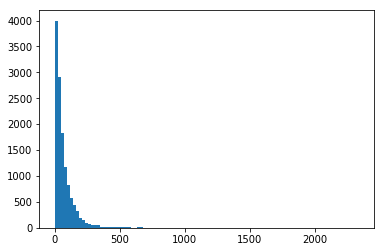

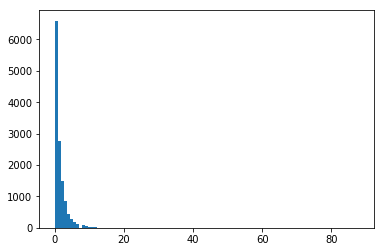

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline


for data in datasets:
    adjective_counts = data.loc[:,"adjectives"]
    superlative_counts = data.loc[:,"superlatives"]
    
    print("Class: " + str(data["class"][0]))
    
    plt.figure()
    plt.hist(np.array(adjective_counts), bins=100)
    
    plt.figure()
    plt.hist(np.array(superlative_counts), bins=100)
    plt.show()

# Avg sentence length

In [88]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

for data in datasets:
    data.loc[:,"avgSentenceLen"] = np.zeros(len(data))

    for idx, body in enumerate(data.text):
        if type(data.text[idx]) == str:
            sentenceLens = list(map(len, tokenizer.tokenize(data.text[idx])))
            totalLen = np.sum(sentenceLens)
            if totalLen > 5: 
                data.avgSentenceLen[idx] = totalLen/len(sentenceLens)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


Class: 0


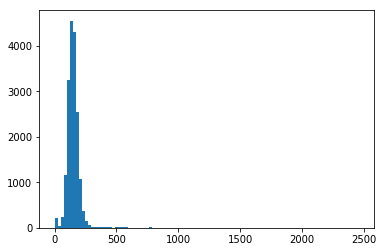

Class: 0


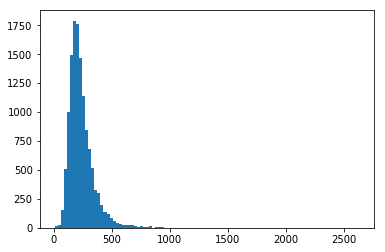

Class: 1


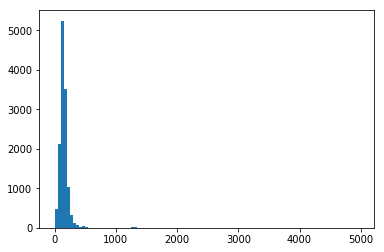

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline


for data in datasets:
    avgSentenceLen = data.loc[:,"avgSentenceLen"]
    
    print("Class: " + str(data["class"][0]))
    
    plt.figure()
    plt.hist(np.array(avgSentenceLen), bins=100)
    plt.show()

# Sentiment analysis

In [107]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

print(nyt.text[1][:140])
ss = sid.polarity_scores(nyt.text[1])
print(ss)
for k in sorted(ss):
    print('{0}: {1}, '.format(k, ss[k]), end='')
    
print()
print()

k = 4
print(fake.text[k][:140])
ss = sid.polarity_scores(fake.text[k])
print(ss)
for k in sorted(ss):
    print('{0}: {1}, '.format(k, ss[k]), end='')
print("\n\n" + str(ss["compound"]))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ubuntu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
New York City’s Education Department said on Wednesday that it would proceed with a fiercely contested plan to redraw elementary school zone
{'pos': 0.031, 'neg': 0.039, 'compound': -0.7096, 'neu': 0.93}
compound: -0.7096, neg: 0.039, neu: 0.93, pos: 0.031, 

Email HEALTHCARE REFORM TO MAKE AMERICA GREAT AGAIN 
Since March of 2010, the American people have had to suffer under the incredible econom
{'pos': 0.13, 'neg': 0.077, 'compound': 0.9664, 'neu': 0.793}
compound: 0.9664, neg: 0.077, neu: 0.793, pos: 0.13, 

0.9664


In [114]:
sid = SentimentIntensityAnalyzer()

for data in datasets:
    data.loc[:,"sent_overall"] = np.zeros(len(data))
    data.loc[:,"sent_pos"] = np.zeros(len(data))
    data.loc[:,"sent_neu"] = np.zeros(len(data))
    data.loc[:,"sent_neg"] = np.zeros(len(data))

    for idx, body in enumerate(data.text):
        if type(body) == str:
            ss = sid.polarity_scores(body)
            data.sent_overall[idx] = ss["compound"]
            data.sent_pos[idx]     = ss["pos"]
            data.sent_neu[idx]     = ss["neu"]
            data.sent_neg[idx]     = ss["neg"]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set 

In [159]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_col_per_class(col, mult=1.0):
    for data in datasets:
        values = data.loc[:,col]

        print("Class: " + str(data["class"][0]))

        plt.figure()
        plt.hist(mult*np.array(values), bins=100)
        plt.show()

## Compound (-1 very neg ---> +1 very positive)

Class: 0


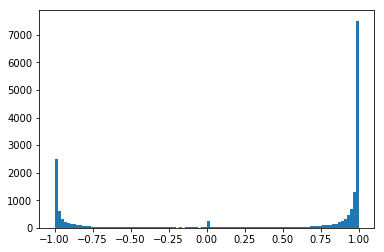

Class: 0


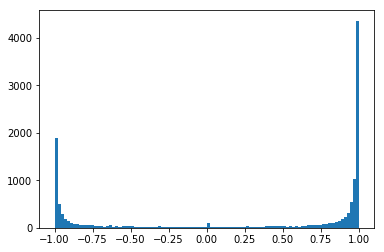

Class: 1


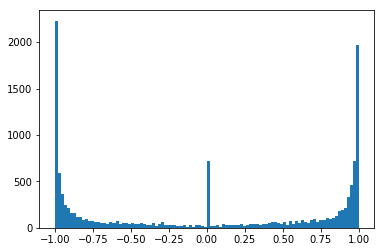

In [115]:
plot_col_per_class("sent_overall")

## Positive

Class: 0


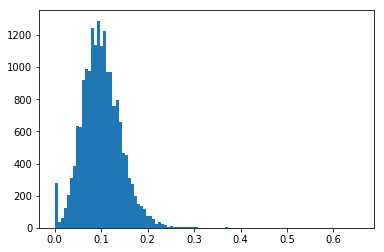

Class: 0


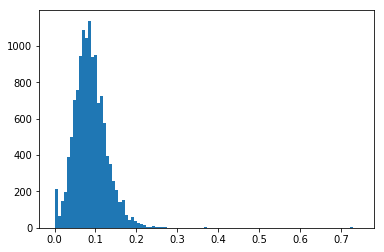

Class: 1


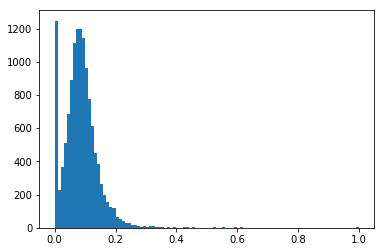

In [116]:
plot_col_per_class("sent_pos")

## Neutral

Class: 0


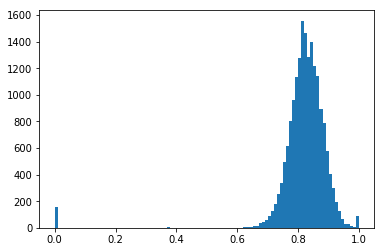

Class: 0


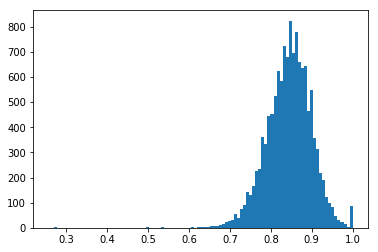

Class: 1


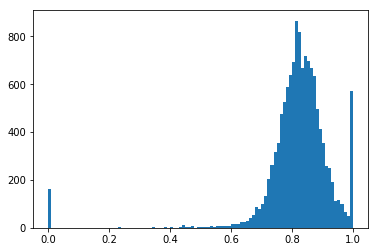

In [117]:
plot_col_per_class("sent_neu")

## Negative

Class: 0


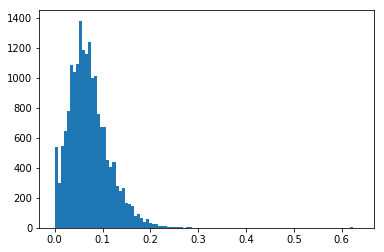

Class: 0


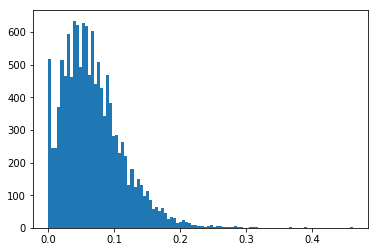

Class: 1


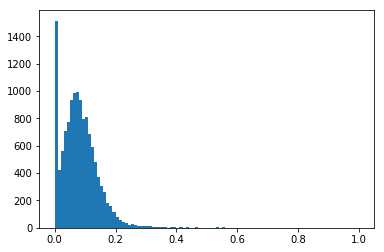

In [118]:
plot_col_per_class("sent_neg")

# Count of spelling errors

In [ ]:
import re
import enchant

d = enchant.Dict("en_US")
punct = set(string.punctuation)
ignore_words = set(["mr", "mrs", "isn’t", "isn't", "they’re", "they're",\
                    "we’re", "he’s", "she’s", "Grexit", "Brexit", "MAGA",\
                    "FBI", "CIA", "NSA", "NOAA", "DHS", "TSA"])
    
for data in datasets:
    data.loc[:,"spelling_errors"] = np.zeros(len(data))

    for idx, body in enumerate(data.text):
        if type(body) == str:
            text = re.sub(r'(^https?:\/\/.*[\r\n]*|"|\'|”|“|–|--|—|\d+)', '',\
                          body, flags=re.MULTILINE) # remove URLs

            text = ("".join([" " if ch in punct else ch for ch in text]))
            text = text.replace("’s", "")
            text = text.replace("’", "")
            text = text.replace("‘", "")
            

            count = 0
            for w in text.split():
                if not w in ignore_words and not d.check(w): 
                    count += 1
            if len(body) > 5:
                data.spelling_errors[idx] = count/len(body)
            else:
                data.spelling_errors[idx] = 0.0

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Class: 0


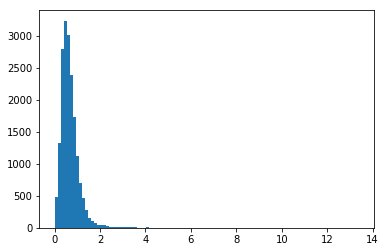

Class: 0


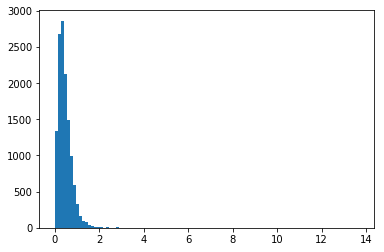

Class: 1


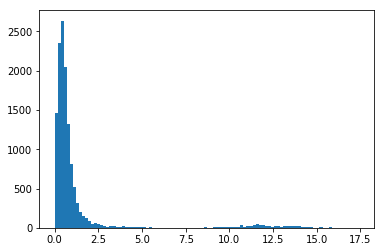

In [160]:
plot_col_per_class("spelling_errors", 100.0)

In [156]:
guardian.head()

,title,text,class,date,allCaps,adjectives,superlatives,avgSentenceLen,compound,pos,neu,neg,sent_overall,sent_pos,sent_neu,sent_neg,spelling_errors
0,Brexit Britain 'highly attractive' to investor...,A post-Brexit Britain could become “highly att...,0,2016-09-26T23:23:15Z,0.0,56.0,1.0,260.700000,0.0,0.0,0.0,0.0,0.8319,0.061,0.898,0.041,0.003823
1,LeBron James will not protest during anthem bu...,LeBron James says he will not join Colin Kaepe...,0,2016-09-26T23:14:08Z,0.0,68.0,0.0,134.965517,0.0,0.0,0.0,0.0,0.9966,0.126,0.829,0.045,0.005830
2,Prisons inspector slates HMP Bedford as 'abjec...,It is easier to get illegal drugs than to get ...,0,2016-09-26T23:01:10Z,0.0,92.0,1.0,208.434783,0.0,0.0,0.0,0.0,-0.9930,0.107,0.745,0.148,0.001246
3,Women poorly represented in top 1% of UK earne...,Fewer than one in five of the UK’s top 1% of e...,0,2016-09-26T23:01:10Z,0.0,72.0,3.0,140.000000,0.0,0.0,0.0,0.0,0.9952,0.140,0.835,0.025,0.003373
4,Consultants enjoy higher demand and pay in wak...,The vote to leave the EU has increased demand ...,0,2016-09-26T23:01:10Z,1.0,44.0,4.0,132.857143,0.0,0.0,0.0,0.0,0.2391,0.071,0.865,0.064,0.004972


In [172]:
guardian_feat = guardian.drop(['compound', 'pos', 'neg', 'title', 'text', 'date'], axis=1)
assert(len(guardian_feat) == len(guardian))
guardian_feat.head()

,class,allCaps,adjectives,superlatives,avgSentenceLen,neu,sent_overall,sent_pos,sent_neu,sent_neg,spelling_errors
0,0,0.0,56.0,1.0,260.700000,0.0,0.8319,0.061,0.898,0.041,0.003823
1,0,0.0,68.0,0.0,134.965517,0.0,0.9966,0.126,0.829,0.045,0.005830
2,0,0.0,92.0,1.0,208.434783,0.0,-0.9930,0.107,0.745,0.148,0.001246
3,0,0.0,72.0,3.0,140.000000,0.0,0.9952,0.140,0.835,0.025,0.003373
4,0,1.0,44.0,4.0,132.857143,0.0,0.2391,0.071,0.865,0.064,0.004972


In [173]:
nyt_feat = nyt.drop(['title', 'text', 'date'], axis=1)
assert(len(nyt_feat) == len(nyt))
nyt_feat.head()

,class,allCaps,adjectives,superlatives,avgSentenceLen,sent_overall,sent_pos,sent_neu,sent_neg,spelling_errors
0,0,0.0,120.0,1.0,165.800000,-0.9574,0.058,0.867,0.074,0.002998
1,0,17.0,81.0,0.0,120.500000,-0.7096,0.031,0.930,0.039,0.000000
2,0,2.0,28.0,1.0,181.375000,0.8516,0.106,0.843,0.051,0.004801
3,0,2.0,113.0,1.0,165.580645,0.9956,0.131,0.804,0.064,0.001744
4,0,0.0,213.0,5.0,224.901961,0.9987,0.084,0.887,0.029,0.004253


In [169]:
fake.head()
fake.columns

Index(['uuid', 'ord_in_thread', 'author', 'published', 'title', 'text',
       'language', 'crawled', 'site_url', 'country', 'domain_rank',
       'thread_title', 'spam_score', 'main_img_url', 'replies_count',
       'participants_count', 'likes', 'comments', 'shares', 'type', 'allCaps',
       'adjectives', 'superlatives', 'class', 'avgSentenceLen', 'sent_overall',
       'sent_pos', 'sent_neu', 'sent_neg', 'spelling_errors'],
      dtype='object')

In [174]:
fake_feat = fake.loc[:, ['allCaps', 'adjectives', 'superlatives',
                         'class', 'avgSentenceLen', 'sent_overall',
                         'sent_pos', 'sent_neu', 'sent_neg', 'spelling_errors']]
assert(len(fake) == len(fake_feat))
fake_feat.head()

,allCaps,adjectives,superlatives,class,avgSentenceLen,sent_overall,sent_pos,sent_neu,sent_neg,spelling_errors
0,1.0,8.0,0.0,1,71.000000,0.3129,0.113,0.797,0.090,0.005941
1,2.0,18.0,0.0,1,147.833333,-0.7562,0.038,0.898,0.064,0.004472
2,2.0,27.0,0.0,1,150.444444,0.8955,0.085,0.882,0.034,0.002935
3,7.0,4.0,0.0,1,66.750000,0.2375,0.267,0.496,0.237,0.007380
4,11.0,43.0,0.0,1,109.105263,0.9664,0.130,0.793,0.077,0.004773


In [175]:
guardian_feat.to_csv("GuardianFeatures_2.csv", index=False)
nyt_feat.to_csv("NytFeatures_2.csv", index=False)
fake_feat.to_csv("fakeFeatures_2.csv", index=False)

In [179]:
guardian_surya = pd.read_csv("FeatureEngineering/GuardianFeatures.csv", encoding='utf-8')
assert(len(guardian_feat) == len(guardian_surya))

nyt_surya      = pd.read_csv("FeatureEngineering/NytFeatures.csv", encoding='utf-8')
assert(len(nyt_feat) == len(nyt_surya))

fake_surya     = pd.read_csv("FeatureEngineering/fakeFeatures.csv", encoding='utf-8')
assert(len(fake_feat) == len(fake_surya))

In [191]:
guardian_feat_merged = pd.concat([guardian_surya, guardian_feat], axis=1)
nyt_feat_merged = pd.concat([nyt_surya, nyt_feat], axis=1)
fake_feat_merged = pd.concat([fake_surya, fake_feat], axis=1)

In [192]:
guardian_feat_merged.rename(columns={'CountofExclaimation': 'CountofExclamation'},\
                            inplace=True)
guardian_feat_merged.to_csv("FeatureEngineering/GuardianFeatures_merged.csv")
guardian_feat_merged.head()

,Article_len,Avg_Word_Len,CountOfNumbers,CountofExclamation,class,allCaps,adjectives,superlatives,avgSentenceLen,neu,sent_overall,sent_pos,sent_neu,sent_neg,spelling_errors
0,469,4.569296,16,0,0,0.0,56.0,1.0,260.700000,0.0,0.8319,0.061,0.898,0.041,0.003823
1,803,3.920299,5,0,0,0.0,68.0,0.0,134.965517,0.0,0.9966,0.126,0.829,0.045,0.005830
2,827,4.759371,42,0,0,0.0,92.0,1.0,208.434783,0.0,-0.9930,0.107,0.745,0.148,0.001246
3,538,4.368030,60,0,0,0.0,72.0,3.0,140.000000,0.0,0.9952,0.140,0.835,0.025,0.003373
4,457,5.002188,50,0,0,1.0,44.0,4.0,132.857143,0.0,0.2391,0.071,0.865,0.064,0.004972


In [193]:
nyt_feat_merged.rename(columns={'CountofExclaimation': 'CountofExclamation'},\
                            inplace=True)
nyt_feat_merged.to_csv("FeatureEngineering/NytFeatures_merged.csv")
nyt_feat_merged.head()

,Article_len,Avg_Word_Len,CountOfNumbers,CountofExclamation,class,allCaps,adjectives,superlatives,avgSentenceLen,sent_overall,sent_pos,sent_neu,sent_neg,spelling_errors
0,1238,4.306139,15,2,0,0.0,120.0,1.0,165.800000,-0.9574,0.058,0.867,0.074,0.002998
1,700,4.765714,84,0,0,17.0,81.0,0.0,120.500000,-0.7096,0.031,0.930,0.039,0.000000
2,238,4.995798,7,0,0,2.0,28.0,1.0,181.375000,0.8516,0.106,0.843,0.051,0.004801
3,872,4.795872,14,0,0,2.0,113.0,1.0,165.580645,0.9956,0.131,0.804,0.064,0.001744
4,2132,4.361632,92,2,0,0.0,213.0,5.0,224.901961,0.9987,0.084,0.887,0.029,0.004253


In [194]:
fake_feat_merged.rename(columns={'CountofExclaimation': 'CountofExclamation'},\
                            inplace=True)
fake_feat_merged.to_csv("FeatureEngineering/fakeFeatures_merged.csv")
fake_feat_merged.head()

,Article_len,Avg_Word_Len,CountOfNumbers,CountofExclamation,allCaps,adjectives,superlatives,class,avgSentenceLen,sent_overall,sent_pos,sent_neu,sent_neg,spelling_errors
0,91,4.505495,2,3,1.0,8.0,0.0,1,71.000000,0.3129,0.113,0.797,0.090,0.005941
1,292,5.027397,16,3,2.0,18.0,0.0,1,147.833333,-0.7562,0.038,0.898,0.064,0.004472
2,241,4.589212,0,0,2.0,27.0,0.0,1,150.444444,0.8955,0.085,0.882,0.034,0.002935
3,48,4.562500,2,1,7.0,4.0,0.0,1,66.750000,0.2375,0.267,0.496,0.237,0.007380
4,337,5.115727,10,0,11.0,43.0,0.0,1,109.105263,0.9664,0.130,0.793,0.077,0.004773


In [195]:
complete_feat = pd.concat([fake_feat_merged, nyt_feat_merged, guardian_feat_merged])
complete_feat.to_csv("FeatureEngineering/complete_feat_dataset.csv", index=False)